In [1]:
%matplotlib inline

In [2]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from IPython.core.display import display_html, display, HTML
from scipy.spatial.distance import *
import cv2

In [3]:
images = {}
for image_path in glob('RTG/B/*'):
    name = image_path.split('/')[-1]
    images[name] = Image.open(image_path)

In [10]:
histograms = {}
for name, image in images.items():
    histograms[name] = np.histogram(image.getdata(), bins=255, normed=False)[0].astype('float32')

<Container object of 255 artists>

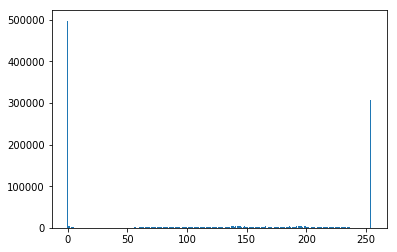

In [11]:
plt.bar(range(len(histograms['8_0_b.PNG'])), height=histograms['8_0_b.PNG'])

In [12]:
methods = [
    cv2.HISTCMP_CORREL,
    cv2.HISTCMP_CHISQR,
    cv2.HISTCMP_CHISQR_ALT,
    cv2.HISTCMP_INTERSECT,
    cv2.HISTCMP_BHATTACHARYYA,
]

In [16]:
method = methods[1]

In [17]:
data = {}
for image1 in images:
    data[image1] = {}
    for image2 in images:
        hist_1 = histograms[image1]
        hist_2 = histograms[image2]
        data[image1][image2] = cv2.compareHist(hist_1, hist_2, method)

In [18]:
sorted(data['8_0_b.PNG'].items(), key=lambda x: x[1], reverse=True)

[('1_6_b.PNG', 352886.70458966156),
 ('9_0_b.PNG', 232272.093602331),
 ('6_0_b.PNG', 216023.75102155047),
 ('14_0_b.PNG', 204427.37567116658),
 ('0_10_b.PNG', 203613.8054707205),
 ('5_0_b.PNG', 186898.35470851185),
 ('3_6_b.PNG', 163819.38048045858),
 ('16_0_b.PNG', 147051.63633105133),
 ('1_8_b.PNG', 141670.35759833237),
 ('1_4_b.PNG', 134408.03900503227),
 ('10_0_b.PNG', 134260.52113558492),
 ('18_0_b.PNG', 129870.10447251989),
 ('2_4_b.PNG', 118593.4910114878),
 ('1_0_b.PNG', 99428.46962713909),
 ('1_2_b.PNG', 97963.05436034329),
 ('0_8_b.PNG', 92798.4958418893),
 ('4_0_b.PNG', 86079.12734762282),
 ('3_0_b.PNG', 81952.53532686674),
 ('7_0_b.PNG', 77598.98625461548),
 ('15_0_b.PNG', 76163.72319831875),
 ('2_0_b.PNG', 65052.10660461709),
 ('13_0_b.PNG', 62749.271946728106),
 ('17_0_b.PNG', 60208.34194274728),
 ('2_6_b.PNG', 56578.985703119375),
 ('12_0_b.PNG', 53636.67110478954),
 ('5_6_b.PNG', 29104.62707604406),
 ('4_6_b.PNG', 27616.316229291322),
 ('11_0_b.PNG', 12577.29011679382),